### Observations:
* The temperatures definitely get higher as the latitude gets closer to the equator.
* The windspeed is zero for a majority of the cities at the equator.
* The humidity becomes higher as the latitude gets closer to the equator.


In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"number of cities:{len(cities)}")

#Create a new df
cities_df=pd.DataFrame({'Cities':cities,'Max Temperature':"",'Humidity':"",'Cloudiness':"",'Windspeed':"",'Lat':"",'Lon':"",'Country':"",'Date':""})

number of cities:610


## Perform API Calls

In [22]:
counter=1
sets=1

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="
print("Beginning Data Retrieval")
print("------------------------")
for index, row in cities_df.iterrows():
    try:
        city=row['Cities']
        query_url=url + city
        print(f"Processing Record {counter}|{city}\n{query_url}")
        response = requests.get(query_url).json()
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Max Temperature'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Windspeed'] = response['wind']['speed']
        cities_df.loc[index, 'Lon'] = response['coord']['lon']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        counter+=1
    except:
        cities_df.loc[index, 'Lat'] = np.nan
        cities_df.loc[index, 'Max Temperature'] = np.nan
        cities_df.loc[index, 'Humidity'] = np.nan
        cities_df.loc[index, 'Cloudiness'] = np.nan
        cities_df.loc[index, 'Windspeed'] = np.nan
        cities_df.loc[index, 'Lon'] = np.nan
    
print("------------------------") 
print("Data Retrieval Complete")
print("------------------------")
    
cities_df.count()

Beginning Data Retrieval
------------------------
Processing Record 1|santa vitoria do palmar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=santa vitoria do palmar
Processing Record 2|margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=margate
Processing Record 3|hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=hermanus
Processing Record 4|severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=severo-kurilsk
Processing Record 5|belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=belaya gora
Processing Record 6|rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=rungata
Processing Record 6|komsomolskiy
http://api.openweathermap.o

Processing Record 48|owando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=owando
Processing Record 49|vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=vaini
Processing Record 50|illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=illoqqortoormiut
Processing Record 50|bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=bilma
Processing Record 51|pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=pangnirtung
Processing Record 52|grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=grand gaube
Processing Record 53|ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=il

Processing Record 98|mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=mahebourg
Processing Record 99|cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=cape town
Processing Record 100|nikolayevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=nikolayevka
Processing Record 101|bharatpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=bharatpur
Processing Record 102|tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=tateyama
Processing Record 103|port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=port alfred
Processing Record 104|port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99

Processing Record 149|ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=ribeira grande
Processing Record 150|lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=lagoa
Processing Record 151|verkhneuralsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=verkhneuralsk
Processing Record 152|lingyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=lingyuan
Processing Record 153|rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=rocha
Processing Record 154|pavino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=pavino
Processing Record 155|skalistyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=s

Processing Record 196|burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=burica
Processing Record 196|lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=lasa
Processing Record 197|norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=norman wells
Processing Record 198|bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=bathsheba
Processing Record 199|gwadar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=gwadar
Processing Record 200|hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=hobyo
Processing Record 201|victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=victoria
Processing 

Processing Record 250|inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=inhambane
Processing Record 251|husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=husavik
Processing Record 252|kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=kaeo
Processing Record 253|fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=fort nelson
Processing Record 254|abasolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=abasolo
Processing Record 255|belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=belushya guba
Processing Record 255|longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&

Processing Record 302|tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=tigil
Processing Record 303|willowmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=willowmore
Processing Record 304|boyuibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=boyuibe
Processing Record 305|sawtell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=sawtell
Processing Record 306|sucua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=sucua
Processing Record 307|puntarenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=puntarenas
Processing Record 308|jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=jalu
Processing Reco

Processing Record 357|ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=ostrovnoy
Processing Record 358|nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=nantucket
Processing Record 359|mkushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=mkushi
Processing Record 360|namtsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=namtsy
Processing Record 361|asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=asau
Processing Record 361|fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=fare
Processing Record 362|stornoway
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=stornoway
Processing Record

Processing Record 410|humberto de campos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=humberto de campos
Processing Record 411|jabiru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=jabiru
Processing Record 411|sawakin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=sawakin
Processing Record 412|krechevitsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=krechevitsy
Processing Record 413|oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=oranjestad
Processing Record 414|astoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=astoria
Processing Record 415|pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a

Processing Record 463|aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=aflu
Processing Record 463|bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=bambous virieux
Processing Record 464|palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=palana
Processing Record 465|ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=ornskoldsvik
Processing Record 466|manjacaze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=manjacaze
Processing Record 467|puerto narino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=puerto narino
Processing Record 468|portmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a

Processing Record 515|cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=cap malheureux
Processing Record 516|shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=shirokiy
Processing Record 517|grajau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=grajau
Processing Record 517|salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=salalah
Processing Record 518|lumphat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=lumphat
Processing Record 519|bullhead city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99a06741a03&q=bullhead city
Processing Record 520|saint-ambroise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7025cdcfb0499055d103a99

Cities             610
Max Temperature    545
Humidity           545
Cloudiness         545
Windspeed          545
Lat                545
Lon                545
Country            610
Date               610
dtype: int64

In [23]:
#Convert string to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Lon'] = pd.to_numeric(cities_df['Lon'])
cities_df['Max Temperature'] = pd.to_numeric(cities_df['Max Temperature'])
cities_df['Windspeed'] = pd.to_numeric(cities_df['Windspeed'])
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])

#Print df
cities_df=cities_df.dropna(how='any')
print(cities_df.count())
cities_df.head()

Cities             545
Max Temperature    545
Humidity           545
Cloudiness         545
Windspeed          545
Lat                545
Lon                545
Country            545
Date               545
dtype: int64


,Cities,Max Temperature,Humidity,Cloudiness,Windspeed,Lat,Lon,Country,Date
0,santa vitoria do palmar,52.61,87.0,80.0,13.80,-33.52,-53.37,BR,1532505673
1,margate,48.20,61.0,40.0,8.05,-43.03,147.26,AU,1532502000
2,hermanus,58.10,76.0,88.0,3.18,-34.42,19.24,ZA,1532505718
3,severo-kurilsk,51.35,96.0,12.0,6.64,50.68,156.12,RU,1532505718
4,belaya gora,48.83,97.0,92.0,10.00,68.54,146.19,RU,1532505719


In [24]:
# Output File (CSV)
cities_df.to_csv("Output/cities.csv")

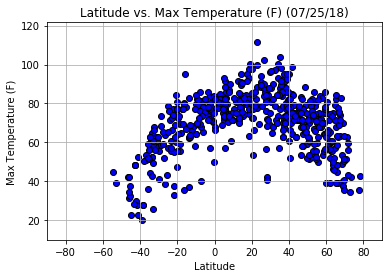

In [25]:
today_date = datetime.datetime.now().strftime('%D')

#Temperature (F) vs. Latitude
plot=plt.scatter(cities_df['Lat'],cities_df['Max Temperature'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlim(-90,90)
plt.ylim(cities_df['Max Temperature'].min()-10,cities_df['Max Temperature'].max()+10)
plt.title(f"Latitude vs. Max Temperature (F) ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Output/Latitude vs. Temperature.png")

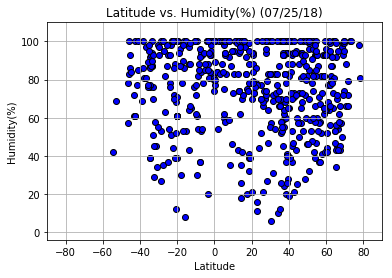

In [26]:
#Humidity (%) vs. Latitude
plot=plt.scatter(cities_df['Lat'],cities_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlim(-90,90)
plt.ylim(cities_df['Humidity'].min()-10,cities_df['Humidity'].max()+10)
plt.title(f"Latitude vs. Humidity(%) ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("Output/Latitude vs. Humidity.png")

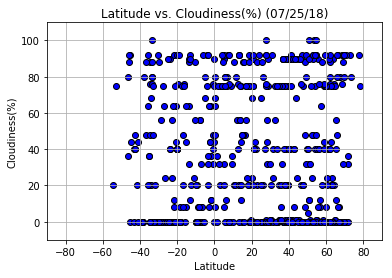

In [28]:
#Cloudiness (%) vs. Latitude
plot=plt.scatter(cities_df['Lat'],cities_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlim(-90,90)
plt.ylim(cities_df['Cloudiness'].min()-10,cities_df['Cloudiness'].max()+10)
plt.title(f"Latitude vs. Cloudiness(%) ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("Output/Latitude vs. Cloudiness.png")

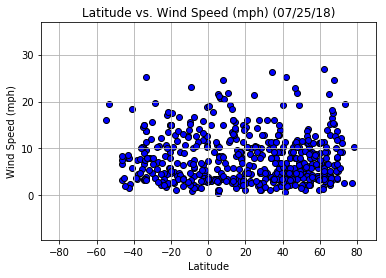

In [27]:
#Wind Speed (mph) vs. Latitude
plot=plt.scatter(cities_df['Lat'],cities_df['Windspeed'], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.xlim(-90,90)
plt.ylim(cities_df['Windspeed'].min()-10,cities_df['Windspeed'].max()+10)
plt.title(f"Latitude vs. Wind Speed (mph) ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Output/Latitude vs. Windspeed.png")